In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import itables

In [2]:
conn_str = os.getenv("CRAIGGER_CONN")  # make sure the tunnel is open
engine = create_engine(conn_str)

In [3]:
pd.read_sql("SELECT * FROM joined_results ORDER BY post_date DESC LIMIT 5;", con=engine)

,mapaddress,geo.region,post_hood,address,quality,lat,lng,zip,craig_address_hash,gconfidence,post_price,post_date,post_bedroom_count,post_sqft,price_per_sqft,netloc,housing,furnished,crawl_date
0,344 Knollglen,US-CA,(Irvine),"344 Knollglen, Irvine, CA 92614, USA",street_address,33.668896,-117.791526,92614,1969359001,9.0,3065,2022-11-01,2,963.0,3.182762,orangecounty.craigslist.org,/ 2br - 963ft2 -,False,2022-11-02
1,21011 Osterman Road,US-CA,"(21011 Osterman Road Lake Forest, CA)","21011 Osterman Rd, Lake Forest, CA 92630, USA",premise,33.657338,-117.667869,92630,1178473171,9.0,2965,2022-11-01,2,930.0,3.188172,orangecounty.craigslist.org,/ 2br - 930ft2 -,False,2022-11-02
2,299 North State College Blvd.,US-CA,(Orange),"299 N State College Blvd, Orange, CA 92868, USA",premise,33.793259,-117.888785,92868,798035400,9.0,3585,2022-11-01,2,1110.0,3.229730,orangecounty.craigslist.org,/ 2br - 1110ft2 -,False,2022-11-02
3,151 East 21st Street,US-CA,(Costa Mesa),"151 E 21st St, Costa Mesa, CA 92627, USA",premise,33.647424,-117.909178,92627,3690073008,9.0,2310,2022-11-01,1,746.0,3.096515,orangecounty.craigslist.org,/ 1br - 746ft2 -,False,2022-11-02
4,21011 Osterman Road,US-CA,"(21011 Osterman Road Lake Forest, CA)","21011 Osterman Rd, Lake Forest, CA 92630, USA",premise,33.657338,-117.667869,92630,1178473171,9.0,2980,2022-11-01,2,900.0,3.311111,orangecounty.craigslist.org,/ 2br - 900ft2 -,False,2022-11-02


In [4]:
df = pd.read_sql("SELECT * FROM joined_results;", con=engine)
df.shape

(828741, 19)

In [5]:
df.to_csv("joined_results_feb13.tsv", sep="\t", index=False)

In [6]:
itables.show(df.groupby(["post_date", "netloc"]).count())

In [9]:
df.netloc.value_counts()

sfbay.craigslist.org           159913
orangecounty.craigslist.org    141961
losangeles.craigslist.org      126571
sandiego.craigslist.org        118447
sacramento.craigslist.org       83433
inlandempire.craigslist.org     65215
ventura.craigslist.org          32403
fresno.craigslist.org           29738
monterey.craigslist.org         15355
stockton.craigslist.org         10102
bakersfield.craigslist.org       8462
chico.craigslist.org             7297
palmsprings.craigslist.org       4606
santabarbara.craigslist.org      4509
slo.craigslist.org               3989
modesto.craigslist.org           3373
visalia.craigslist.org           3356
hanford.craigslist.org           2982
santamaria.craigslist.org        2157
redding.craigslist.org           1737
goldcountry.craigslist.org       1121
humboldt.craigslist.org           649
yubasutter.craigslist.org         468
merced.craigslist.org             359
mendocino.craigslist.org          265
imperial.craigslist.org           127
siskiyou.cra

/tmp/ipykernel_80492/3697574371.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  & (df.post_date > pd.to_datetime('2020-11-01'))


<AxesSubplot: xlabel='post_date', ylabel='price_per_sqft'>

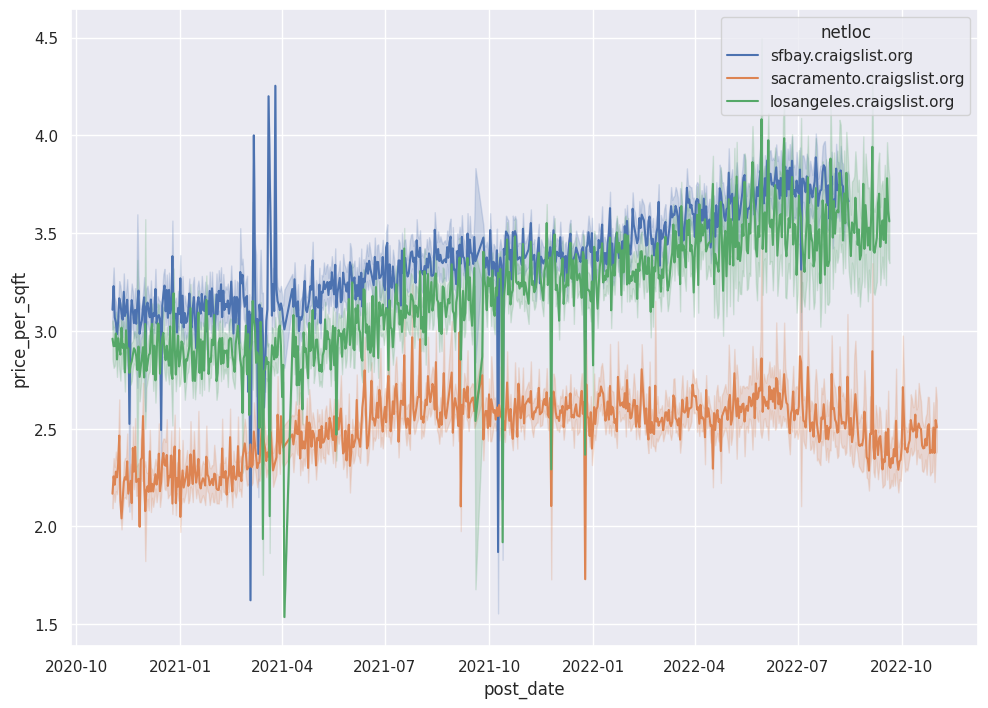

In [11]:
netlocs = [
    "losangeles.craigslist.org",
    "sfbay.craigslist.org",
    "sacramento.craigslist.org",
    "orangecountry.craigslist.org",
]
dfp = df[
    df.netloc.map(lambda x: x in netlocs)
    & (df.post_date > pd.to_datetime("2020-11-01"))
    & (1.5 < df.price_per_sqft)
    & (df.price_per_sqft < 5.0)
]

sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.lineplot(y="price_per_sqft", x="post_date", hue="netloc", data=dfp)

In [8]:
df["netloc"].value_counts()

sfbay.craigslist.org           159913
orangecounty.craigslist.org    141961
losangeles.craigslist.org      126571
sandiego.craigslist.org        118447
sacramento.craigslist.org       83433
inlandempire.craigslist.org     65215
ventura.craigslist.org          32403
fresno.craigslist.org           29738
monterey.craigslist.org         15355
stockton.craigslist.org         10102
bakersfield.craigslist.org       8462
chico.craigslist.org             7297
palmsprings.craigslist.org       4606
santabarbara.craigslist.org      4509
slo.craigslist.org               3989
modesto.craigslist.org           3373
visalia.craigslist.org           3356
hanford.craigslist.org           2982
santamaria.craigslist.org        2157
redding.craigslist.org           1737
goldcountry.craigslist.org       1121
humboldt.craigslist.org           649
yubasutter.craigslist.org         468
merced.craigslist.org             359
mendocino.craigslist.org          265
imperial.craigslist.org           127
siskiyou.cra